One method which we use to examine how good are the models is called mixing up.

We will follow with an example found below:

In [1]:
from sklearn import datasets

bc = datasets.load_breast_cancer(as_frame=True)
bc.data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


The above data repsresent biopsys for breast cancer (classification problem)

We want to predict if the biopsy is either harmfoul(0) or not (1)

In [2]:
bc.target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

We have to seperate the data between testing and training

- scikit-learn has a built in function for that: train_test_split()
Note: This functions seperates the data randomly hence each time performed it will output different data

If we want a more stochastic approach to produce the same results we need to use random_state

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.25, 
                                                    random_state=1234)

print(X_train.shape, y_train.shape)

(426, 30) (426,)


In [4]:
from sklearn.svm import SVC

svm_clf = SVC()

In [5]:
svm_clf.fit(X_train, y_train)

SVC()

In [6]:
predicted = svm_clf.predict(X_test)

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        55
           1       0.88      1.00      0.94        88

    accuracy                           0.92       143
   macro avg       0.94      0.89      0.91       143
weighted avg       0.93      0.92      0.91       143



Since we havent set a specific kernel , the model uses the preselected one (kernel = 'rbf') 

seperates non linear data

In [8]:
# Changing the kernel
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
predicted = svm_clf.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        55
           1       0.93      0.98      0.96        88

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



Another method of machine learning is (Stochastic Gradient Descent)

It created a linear function and based on the data it calculates the classes that we want

During training the model , this function most probobly will result to false outcomes.

We want to minimize this errors - hence we need to use derivatives ( gradient at a point)

It is called stochastic , because during the training process the data re seperated in batches and we calculate the loss and the corrections based on the derivatives

Lets see it in practice:

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=1234)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=1234)

In [10]:
predicted = sgd_clf.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        55
           1       0.88      0.98      0.92        88

    accuracy                           0.90       143
   macro avg       0.92      0.88      0.89       143
weighted avg       0.91      0.90      0.90       143



We can see that the result is pretty accurate

Lets see if we can do better now

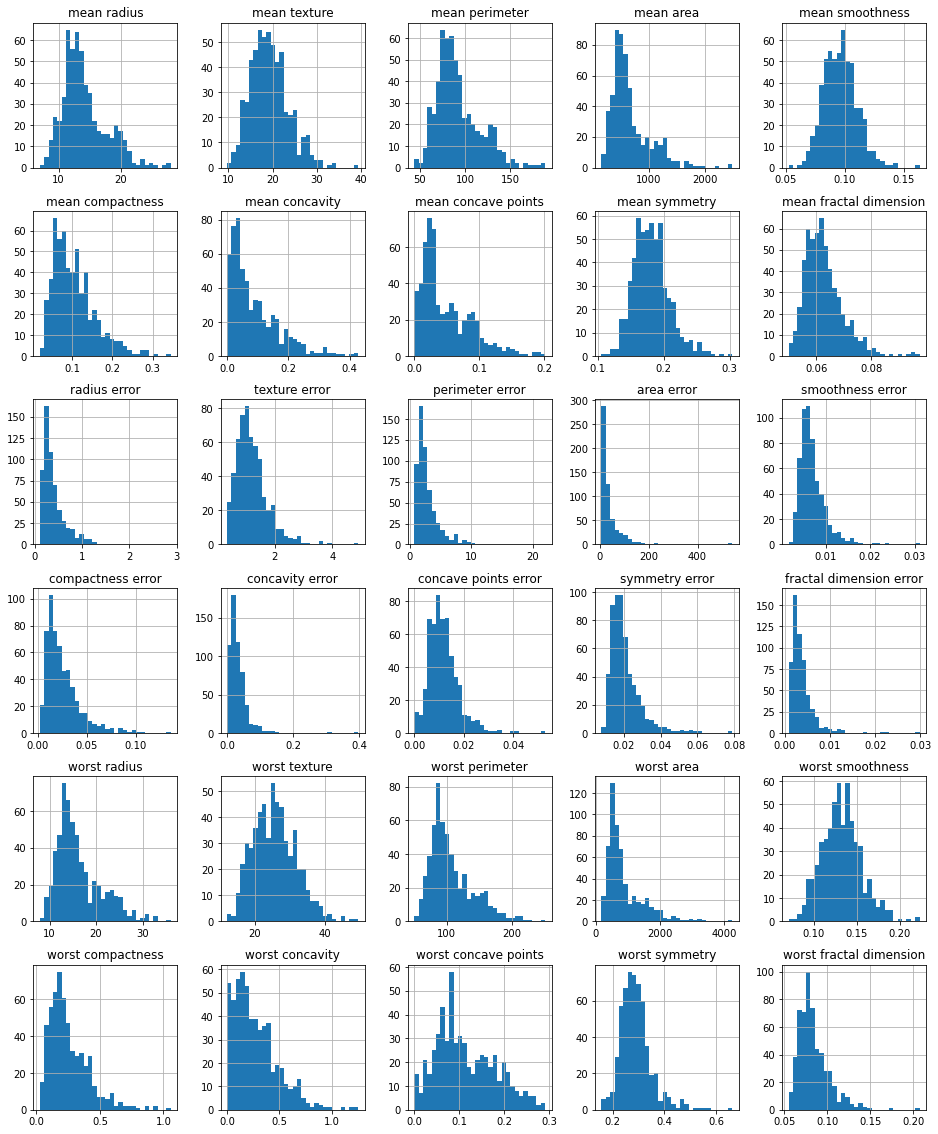

In [11]:
_ = bc.data.hist(figsize=(16, 20), bins=30)

We can see from the above histograms that we have a variation of graphs

Some methods of machine learning produce better results if we have normalised data

For example changing our data to fit between 0 and 1

Stochastic machine learning is usually one of the methods that require normalization of data

So we will normalise our data to have a mean of 0 and variance of 1 using StandardScaler
using the training data

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

We then change our data , both training and testing, using transform()

In practice StandardScaler  

x′=x−μ / σ^2

Note:

Training scalar happens only in training data

Transform happens in both training and testing

In [13]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
sgd_clf = SGDClassifier(random_state=1234)
sgd_clf.fit(X_train_scaled, y_train)
predicted = sgd_clf.predict(X_test_scaled)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        55
           1       0.96      0.99      0.97        88

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



Hence we can see a clear increase to 0.97 rather than what we had before

train_test_split() simplifies the procedure of creating training and testing

Although we have a problem:

Since we have randomm data selection for training and testing data then the classification report will depend on how the data are being split up

Its true that if we remove the random_state statement we will receive different values

Hence to have a better result from out classifier we use (k-fold cross validation) , which performes k checks

NOTE:

For each test we take a portion containing 1/k of our data and we set it as the check data , the rest we use them as training data

https://en.wikipedia.org/wiki/Cross-validation_(statistics)

In [17]:
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(random_state=1234)
scores = cross_val_score(sgd_clf, bc.data, bc.target, cv=5) # 5 trainings
scores

array([0.87719298, 0.92982456, 0.90350877, 0.95614035, 0.91150442])

In [16]:
print(scores.mean(), scores.std())

0.9156342182890855 0.02639667733319382




    Πλην όμως είδαμε ότι μπορούμε να πάρουμε καλύτερα αποτελέσματα αν κανονικοποιήσουμε τα δεδομένα.

    Επομένως θέλουμε σε κάθε μία επικύρωση να δημιουργείται δεδομένα εκπαίδευσης και δεδομένα ελέγχου, να εκπαιδεύεται ο StandardScaler στα δεδομένα εκπαίδευσης μόνο, να εφαρμόζεται τόσο στα δεδομένα εκπαίδευσης όσο και στα δεδομένα ελέγχου, και να κάνουμε την εκπαίδευση του ταξινομητή και στη συνέχεια την αξιολόγησή του.

    Για να γίνονται όλα σωστά και με τη σειρά, μπορούμε να χρησιμοποιήσουμε τη δυνατότητα της διασωλήνωσης (ή διοχέτευσης, pipeline) που μας προσφέρει το scikit-learn.

    Άρα μετά την κανονικοποίηση, μπορούμε να αποφανθούμε σχετικά με την απόδοση του ταξινομητή μας:

    Και τώρα, μπορείτε να ρωτήσετε, ποιον ταξινομητή θα χρησιμοποιήσουμε, από τους πέντε που κατασκευάστηκαν;

    Η απάντηση είναι, κανέναν από αυτούς.

    Τους πέντε ταξινομητές τους κατασκευάσαμε για να έχουμε μια εκτίμηση της απόδοσης της προσέγγισής μας.

    Αφού την αποκτήσαμε, μπορούμε να εκπαιδεύσουμε εκ νέου τον ταξινομητή μας με το σύνολο πλέον των δεδομένων που έχουμε στη διάθεσή μας.



In [18]:
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SGDClassifier(random_state=1234))
scores = cross_val_score(clf, bc.data, bc.target, cv=5)
scores

array([0.96491228, 0.98245614, 0.94736842, 0.96491228, 0.99115044])

In [19]:
print(scores.mean(), scores.std())

0.9701599130569786 0.01527302805266976
